In [241]:
library(quantmod)
library(ggplot2)

# Download JPM data from Yahoo Finance
getSymbols(c("JPM", "^GSPC"), src = "yahoo", from = '2018-02-01', to = '2018-12-30', getSymbols.yahoo.warning=FALSE)

# Show first few rows from the dataset
print("JPM - JP Morgan stock")
head(JPM)

print("^GSPC - S&P 500")
head(GSPC)

[1] "JPM"  "GSPC"

[1] "JPM - JP Morgan stock"


           JPM.Open JPM.High JPM.Low JPM.Close JPM.Volume JPM.Adjusted
2018-02-01   115.77   116.99  115.48    116.87   13800600     113.9224
2018-02-02   116.49   116.92  114.09    114.28   16477300     111.3978
2018-02-05   113.00   114.59  103.98    108.80   30097600     106.0560
2018-02-06   106.85   112.48  106.61    112.11   33114800     109.2825
2018-02-07   111.55   114.45  111.15    112.87   21878300     110.0233
2018-02-08   113.11   113.11  107.84    107.88   27425800     105.1592

[1] "^GSPC - S&P 500"


           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
2018-02-01   2816.45   2835.96  2812.70    2821.98  3938450000       2821.98
2018-02-02   2808.92   2808.92  2759.97    2762.13  4301130000       2762.13
2018-02-05   2741.06   2763.39  2638.17    2648.94  5283460000       2648.94
2018-02-06   2614.78   2701.04  2593.07    2695.14  5891660000       2695.14
2018-02-07   2690.95   2727.67  2681.33    2681.66  4626570000       2681.66
2018-02-08   2685.01   2685.27  2580.56    2581.00  5305440000       2581.00

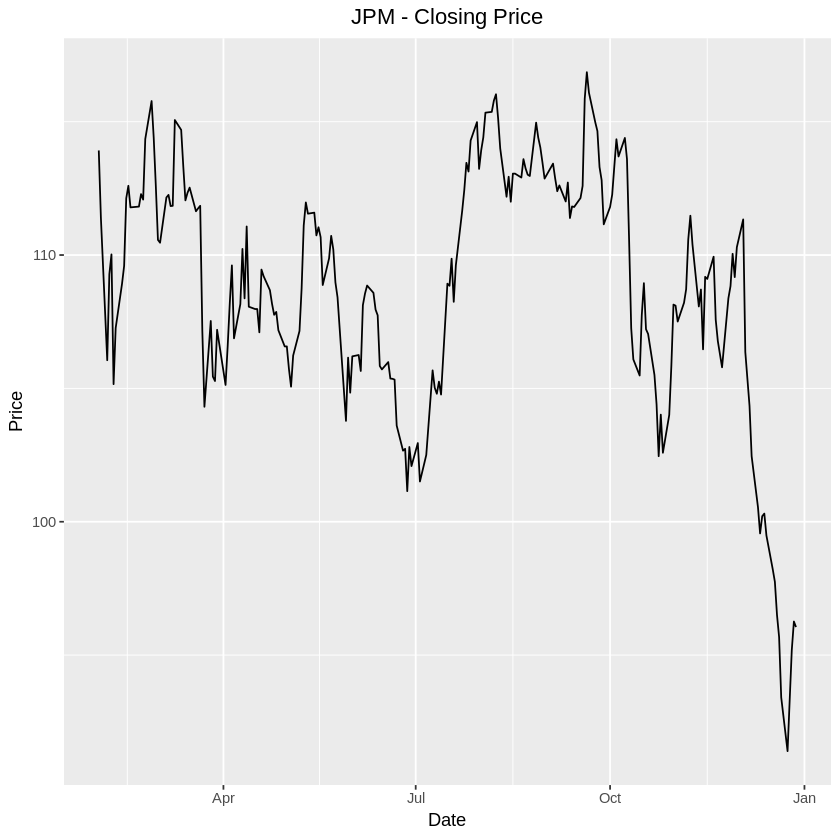

In [242]:
ggplot(JPM, aes(Index)) + 
    geom_line(aes(y = JPM.Adjusted))+
    ggtitle("JPM - Closing Price") +
    labs(x = "Date", y = "Price") + 
    theme(plot.title = element_text(hjust = 0.5))

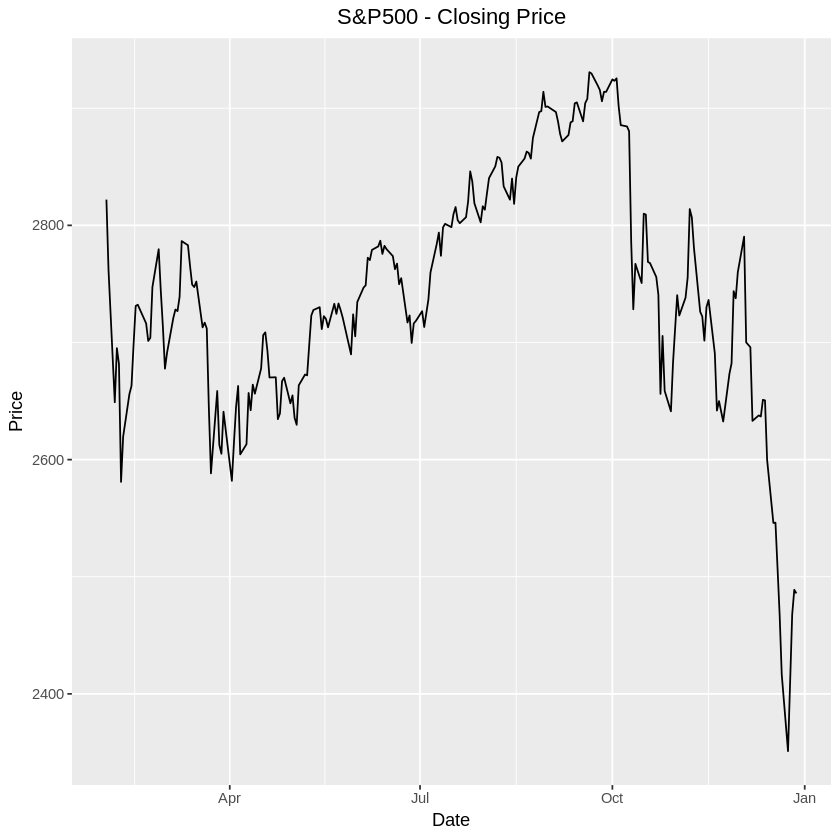

In [243]:
ggplot(GSPC, aes(Index)) + 
    geom_line(aes(y = GSPC.Adjusted))+
    ggtitle("S&P500 - Closing Price") +
    labs(x = "Date", y = "Price") + 
    theme(plot.title = element_text(hjust = 0.5))

In [244]:
# Merge both dataset together and rename the columns
combined = merge(GSPC$"GSPC.Adjusted", JPM$"JPM.Adjusted")
colnames(combined) = c("GSPC", "JPM")

# Show first few rows of merged dataset
head(combined)

              GSPC      JPM
2018-02-01 2821.98 113.9224
2018-02-02 2762.13 111.3978
2018-02-05 2648.94 106.0560
2018-02-06 2695.14 109.2825
2018-02-07 2681.66 110.0233
2018-02-08 2581.00 105.1592

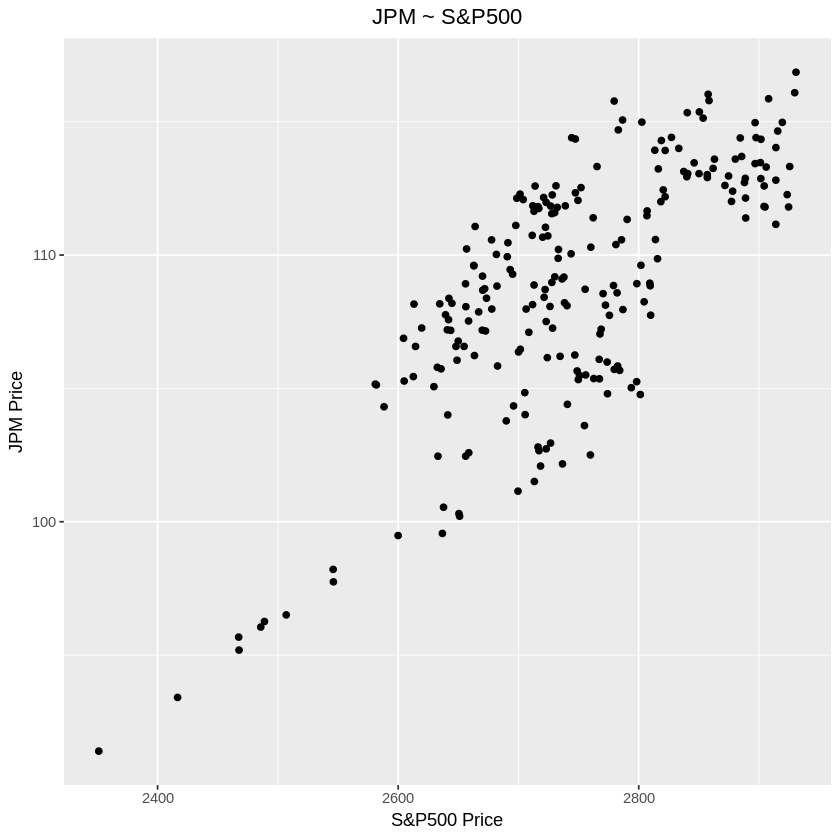

In [245]:
# Using a scatter plot to visualise the two dataset
# - Explanatory variable(GSPC) on the x-axis
# - Explained variable(JPM) on the y-axis
ggplot(combined, aes(GSPC)) + 
    geom_point(aes(y = JPM))+
    ggtitle("JPM ~ S&P500") +
    labs(x = "S&P500 Price", y = "JPM Price") + 
    theme(plot.title = element_text(hjust = 0.5))

In [246]:
# Using linear regression to JPM against GSPC with intercept
fit = lm(combined$JPM ~ combined$GSPC)
summary(fit)


Call:
lm(formula = combined$JPM ~ combined$GSPC)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8550 -2.4328  0.4907  2.4191  5.7318 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   13.954536   5.373016   2.597     0.01 *  
combined$GSPC  0.034569   0.001957  17.662   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.014 on 227 degrees of freedom
Multiple R-squared:  0.5788,	Adjusted R-squared:  0.5769 
F-statistic: 311.9 on 1 and 227 DF,  p-value: < 2.2e-16


In [247]:
# predicted_df <- data.frame(mpg_pred = predict(lm_fit, df), hp=df$hp)
fit[1]
fit$coef[[1]]
fit$coef[[2]]

$coefficients
  (Intercept) combined$GSPC 
  13.95453581    0.03456907

[1] 13.95454

[1] 0.03456907

In [252]:
# Generate predictions with model and data
predicted = predict(fit, combined)

# Create new dataframe with prediction
combinedWithPrediction = data.frame(date=index(combined), coredata(combined), JPM_Prediction = predicted)

# Show first few rows of data
head(combinedWithPrediction)

,date,GSPC,JPM,JPM_Prediction
2018-02-01,2018-02-01,2821.98,113.9224,111.5078
2018-02-02,2018-02-02,2762.13,111.3978,109.4388
2018-02-05,2018-02-05,2648.94,106.0560,105.5259
2018-02-06,2018-02-06,2695.14,109.2825,107.1230
2018-02-07,2018-02-07,2681.66,110.0233,106.6570
2018-02-08,2018-02-08,2581.00,105.1592,103.1773


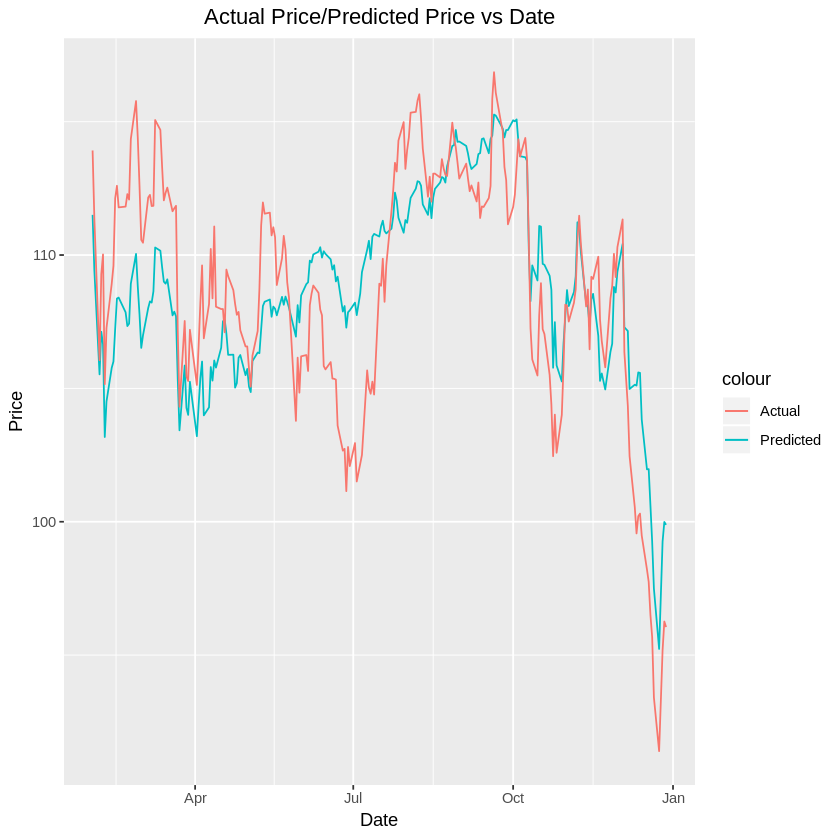

In [257]:
# Plot actual price and predicted price on the same graph
ggplot(combinedWithPrediction, aes(date)) + 
    geom_line(aes(y = combinedWithPrediction$JPM_Prediction, color = "Predicted"))+
    geom_line(aes(y = combinedWithPrediction$JPM, color = "Actual"))+
    ggtitle("Actual Price/Predicted Price vs Date") +
    labs(x = "Date", y = "Price") + 
    theme(plot.title = element_text(hjust = 0.5))

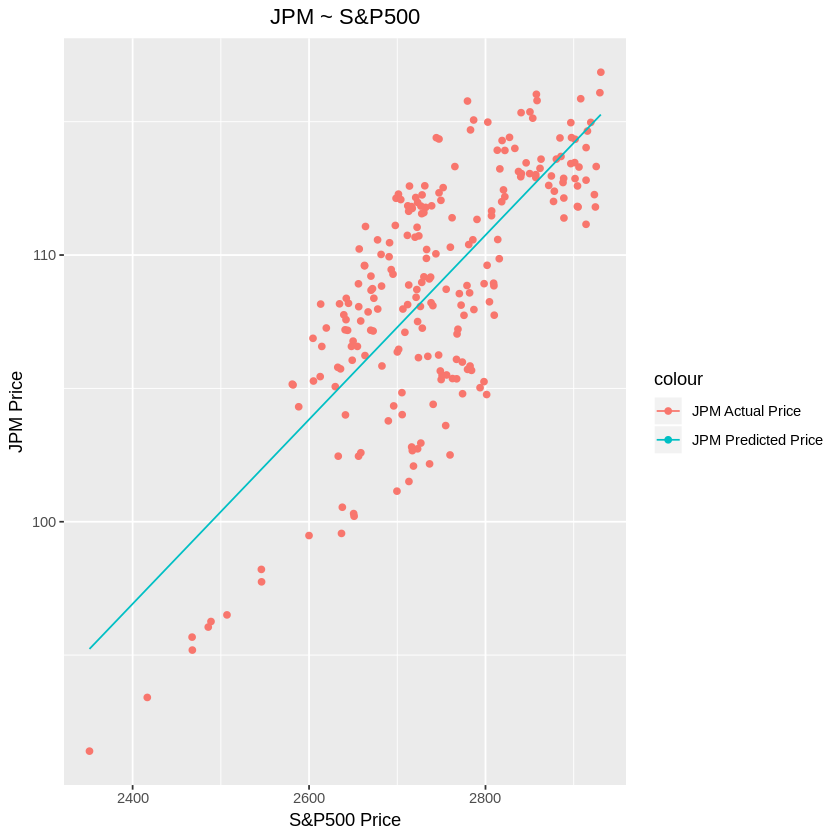

In [258]:
# Plotting linear regression line on scatter plot
ggplot(combinedWithPrediction, aes(GSPC)) + 
    geom_point(aes(y = JPM, color = "JPM Actual Price"))+
    geom_line(aes(y = JPM_Prediction, color = "JPM Predicted Price"))+
    ggtitle("JPM ~ S&P500") +
    labs(x = "S&P500 Price", y = "JPM Price") + 
    theme(plot.title = element_text(hjust = 0.5))